# Classification of audio files

Mounting Google Drive to load the dataset.

In [33]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


## Procedure and approach to solution of the problem

To analyze the performance of a classification model on a dataset containing "wav" files, you can follow these steps:

1. Load the audio files and `development.csv` file into your programming environment.
2. Preprocess the audio data as needed. This may include tasks such as extracting features from the audio files or normalizing the data.
3. Split the development set into a training set and a validation set.
4. Train the classification model on the training set using one of the methods I mentioned earlier (e.g. KNN, SVM, etc.).
5. Use the *trained model to make predictions on the validation set*.
6. Evaluate the model's performance by calculating relevant metrics such as *accuracy*, precision, recall, and F1 score.
7. Fine-tune the model by adjusting its hyperparameters or trying a different classification method.
8. Repeat steps 4-7 until you are satisfied with the model's performance on the validation set.
9. Use the finalized model to make predictions on the evaluation set, using the sample_submission.csv file as a template for the format of the output.

Keep in mind that this is just one way to analyze a classification model on a dataset containing "wav" files, and there are many other approaches you could take as well.

## Data preparation, preprocessing and visualization.

In [2]:
train_df = pd.read_csv("./dsl_data/development.csv")

train_df

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
...,...,...,...,...,...,...,...,...,...,...
9849,9849,dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...,vnljypgejkINbBAY,decrease,volume,native,English (United States),English (United States),male,22-40
9850,9850,dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40
9851,9851,dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40
9852,9852,dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40


In [3]:
test_df = pd.read_csv("./dsl_data/evaluation.csv")
test_df

,Id,path,speakerId,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
0,0,dsl_data/audio/speakers/NgQEvO2x7Vh3xy2xz/f53c...,NgQEvO2x7Vh3xy2xz,native,English (United States),English (United States),male,22-40
1,1,dsl_data/audio/speakers/k5bqyxx2lzIbrlg9/1d5f8...,k5bqyxx2lzIbrlg9,native,English (United States),English (United States),male,22-40
2,2,dsl_data/audio/speakers/7B4XmNppyrCK977p/1c0d5...,7B4XmNppyrCK977p,native,English (United States),English (United States),male,41-65
3,3,dsl_data/audio/speakers/k5bqyxx2lzIbrlg9/275c3...,k5bqyxx2lzIbrlg9,native,English (United States),English (United States),male,22-40
4,4,dsl_data/audio/speakers/V4ZbwLm9G5irobWn/b7c7a...,V4ZbwLm9G5irobWn,native,English (United States),English (United States),female,41-65
...,...,...,...,...,...,...,...,...
1450,1450,dsl_data/audio/speakers/oOK5kxoW7dskMbaK/02f5d...,oOK5kxoW7dskMbaK,native,English (United States),English (United States),female,22-40
1451,1451,dsl_data/audio/speakers/oOK5kxoW7dskMbaK/87191...,oOK5kxoW7dskMbaK,native,English (United States),English (United States),female,22-40
1452,1452,dsl_data/audio/speakers/ppymZZDb2Bf4NQnE/f2a9e...,ppymZZDb2Bf4NQnE,native,English (United States),English (United States),female,41-65
1453,1453,dsl_data/audio/speakers/aokxBz9LxXHzZzay/f347b...,aokxBz9LxXHzZzay,native,English (United States),English (United States),female,22-40


Need to predict according to Id, the action and object.

There are 9 attributes and we can store them properly and starting proceeding with data preparation and preprocessing.

1. First let's check if any of the attributes contains empty strings.
2. Show the characteristics of the data with some data visualization.

In [7]:
# Display all columns of the table

print(train_df.columns.tolist())

['Id', 'path', 'speakerId', 'action', 'object', 'Self-reported fluency level ', 'First Language spoken', 'Current language used for work/school', 'gender', 'ageRange']


In [5]:
# Print the unique values in the "gender" column
print(train_df['gender'].unique())

['female' 'male']


Checking for both datasets if any missing/empty values are present in a sample column before.

In [8]:
# Check if any values in the "column_name" column are empty
if train_df['path'].isnull().values.any():
    print("The 'path' column in training dataset contains empty values.")
else:
    print("The 'path' column in training dataset does not contain empty values.")

# Check if any values in the "column_name" column are empty
if test_df['path'].isnull().values.any():
    print("The 'path' column in test dataset contains empty values.")
else:
    print("The 'path' column in test dataset does not contain empty values.")

The 'path' column in training dataset does not contain empty values.
The 'path' column in test dataset does not contain empty values.


Indeed, we can have a look at the whole dataset and notice that it will not contain any missing values.

In [9]:
# Check if there are any missing values in any column in trining dataframe

if train_df.isnull().any(axis=0).any():
    print("The DataFrame contains missing values.")
else:
    print("The DataFrame does not contain any missing values.")

# Check if there are any missing values in any column in test dataframe

if test_df.isnull().any(axis=0).any():
    print("The DataFrame contains missing values.")
else:
    print("The DataFrame does not contain any missing values.")

The DataFrame does not contain any missing values.
The DataFrame does not contain any missing values.


Let's check if there are duplicates data meaning that the duplicated method considers a row to be a duplicate if all of its values are the same as those in another row.

If you want to check for duplicates based on a subset of the columns in the DataFrame, you can pass a list of column names to the duplicated method:



In [10]:
# Check if there are any duplicates based on the "id" and "path" columns
if train_df.duplicated(['Id', 'path']).any():
    print("The DataFrame contains duplicated rows. Please check for more.")
else:
    print("The DataFrame does not contain any duplicated rows.")

# Check if there are any duplicates based on the "id" and "path" columns
if test_df.duplicated(['Id', 'path']).any():
    print("The DataFrame contains duplicated rows. Please check for more.")
else:
    print("The DataFrame does not contain any duplicated rows.")



The DataFrame does not contain any duplicated rows.
The DataFrame does not contain any duplicated rows.


In [11]:
# Print the distinct attributes in the "column_name" column
attributes = train_df['path'].unique()
print("Distinct attributes in the 'column_name' column:", attributes)

Distinct attributes in the 'column_name' column: ['dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a3129c0-4474-11e9-a9a5-5dbec3b8816a.wav'
 'dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42a80-4474-11e9-a9a5-5dbec3b8816a.wav'
 'dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3920-4474-11e9-a9a5-5dbec3b8816a.wav'
 ...
 'dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c290-450d-11e9-9539-7f047cfe24d1.wav'
 'dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42220-450d-11e9-9539-7f047cfe24d1.wav'
 'dsl_data/audio/speakers/vnljypgejkINbBAY/61b7aef0-450d-11e9-9539-7f047cfe24d1.wav']


## Data distribution

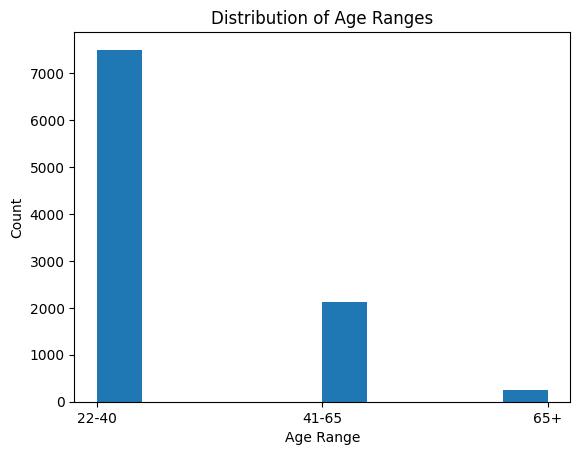

In [10]:
# Create a histogram for the "ageRange" column
plt.hist(train_df['ageRange'])
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Distribution of Age Ranges')
plt.show()


In [24]:
train_df.rename(columns={'Self-reported fluency level ': 'fluency_level', 'First Language spoken' : 'native_language', 'Current language used for work/school' : 'job_language'}, inplace=True)
train_df['fluency_level']


0       advanced
1       advanced
2       advanced
3       advanced
4       advanced
          ...   
9849      native
9850      native
9851      native
9852      native
9853      native
Name: fluency_level, Length: 9854, dtype: object

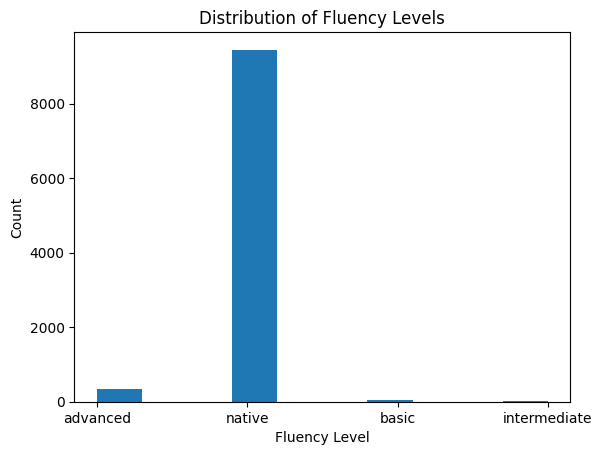

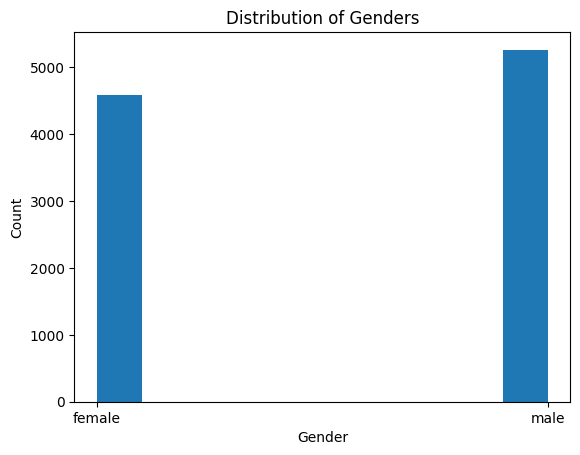

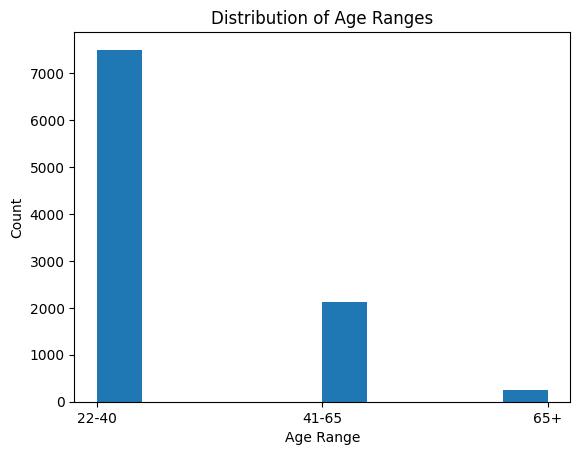

In [13]:
# Create a histogram for the "Self-reported fluency level" column
plt.hist(train_df['fluency_level'])
plt.xlabel('Fluency Level')
plt.ylabel('Count')
plt.title('Distribution of Fluency Levels')
plt.show()

# Create a histogram for the "gender" column
plt.hist(train_df['gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

# Create a histogram for the "ageRange" column
plt.hist(train_df['ageRange'])
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Distribution of Age Ranges')
plt.show()


### Fluency proportion

In [65]:
# Group the DataFrame by "Self-reported fluency level" and "gender"
groups = train_df.groupby(['fluency_level', 'gender'])


In [66]:
# Define a function that prints the groups
def print_groups(groups):
    for name, group in groups:
        print(name)
        print(group)

In [67]:
print_groups(groups)

('advanced', 'female')
        Id                                               path  \
0        0  dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...   
1        1  dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...   
2        2  dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...   
3        3  dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...   
4        4  dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...   
...    ...                                                ...   
9043  9043  dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/cc514...   
9044  9044  dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/ded03...   
9045  9045  dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/e681b...   
9046  9046  dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/e90aa...   
9047  9047  dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/ef132...   

             speakerId           action  object fluency_level  \
0     2BqVo8kVB2Skwgyb  change language    none      advanced   
1     2BqVo8kVB2Skwgyb         activate   music      advanced   
2

In [68]:
fluency_counts = train_df['fluency_level'].value_counts()
print(fluency_counts)
# Group the DataFrame by "Self-reported fluency level" and "gender"
groups = df.groupby(['fluency_level', 'gender'])
print_groups(groups)

# Count the number of rows in each group
fluency_proportions = groups.size()

native          9444
advanced         346
basic             56
intermediate       8
Name: fluency_level, dtype: int64
('advanced', 'female')
        Id                                               path  \
0        0  dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...   
1        1  dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...   
2        2  dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...   
3        3  dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...   
4        4  dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...   
...    ...                                                ...   
9043  9043  dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/cc514...   
9044  9044  dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/ded03...   
9045  9045  dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/e681b...   
9046  9046  dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/e90aa...   
9047  9047  dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/ef132...   

             speakerId           action  object fluency_level  \
0     2BqVo8k

In [1]:
""" To be fixed or replaced by other plot representations for data visualization.
# Create the stacked bar chart
bar_width = 0.8
x = np.arange(len(fluency_counts))
plt.bar(x, fluency_counts, bar_width, label='Fluency')
plt.bar(x, fluency_proportions['male'], bar_width, bottom=fluency_proportions['female'], label='Male')
plt.bar(x, fluency_proportions['female'], bar_width, label='Female')
plt.xticks(x, fluency_counts.index)
plt.legend()
plt.show()
"""

" To be fixed or replaced by other plot representations for data visualization.\n# Create the stacked bar chart\nbar_width = 0.8\nx = np.arange(len(fluency_counts))\nplt.bar(x, fluency_counts, bar_width, label='Fluency')\nplt.bar(x, fluency_proportions['male'], bar_width, bottom=fluency_proportions['female'], label='Male')\nplt.bar(x, fluency_proportions['female'], bar_width, label='Female')\nplt.xticks(x, fluency_counts.index)\nplt.legend()\nplt.show()\n"

### Plots

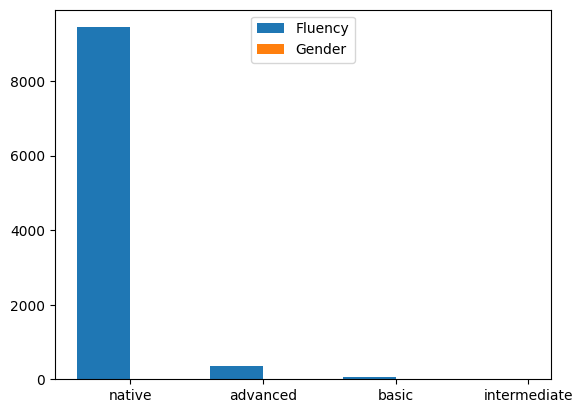

In [23]:
# Create a bar chart comparing the distribution of "Self-reported fluency level" and "gender"
fluency_counts = df['fluency_level'].value_counts()
gender_counts = df['gender'].value_counts()

# Add missing indices to the gender_counts series
gender_counts = gender_counts.reindex(fluency_counts.index)

# Now the shapes match and the plot should work correctly
x = range(len(fluency_counts))
plt.bar(x, fluency_counts, width=0.4, label='Fluency')
plt.bar([i+0.4 for i in x], gender_counts, width=0.4, label='Gender')
plt.xticks([i+0.2 for i in x], fluency_counts.index)
plt.legend()
plt.show()



In [27]:
"""
fluency_counts = df['fluency_level'].value_counts()
gender_counts = df['gender'].value_counts()

# Add missing indices to the gender_counts series
gender_counts = gender_counts.reindex(fluency_counts.index)

# Calculate the proportion of each fluency level that is male/female
fluency_proportions = gender_counts / fluency_counts

# Create the stacked bar chart
bar_width = 0.8
x = np.arange(len(fluency_counts))
plt.bar(x, fluency_counts, bar_width, label='Fluency')
plt.bar(x, fluency_proportions['male'], bar_width, bottom=fluency_proportions['female'], label='Male')
plt.bar(x, fluency_proportions['female'], bar_width, label='Female')
plt.xticks(x, fluency_counts.index)
plt.legend()
plt.show()
"""

"\nfluency_counts = df['fluency_level'].value_counts()\ngender_counts = df['gender'].value_counts()\n\n# Add missing indices to the gender_counts series\ngender_counts = gender_counts.reindex(fluency_counts.index)\n\n# Calculate the proportion of each fluency level that is male/female\nfluency_proportions = gender_counts / fluency_counts\n\n# Create the stacked bar chart\nbar_width = 0.8\nx = np.arange(len(fluency_counts))\nplt.bar(x, fluency_counts, bar_width, label='Fluency')\nplt.bar(x, fluency_proportions['male'], bar_width, bottom=fluency_proportions['female'], label='Male')\nplt.bar(x, fluency_proportions['female'], bar_width, label='Female')\nplt.xticks(x, fluency_counts.index)\nplt.legend()\nplt.show()\n"

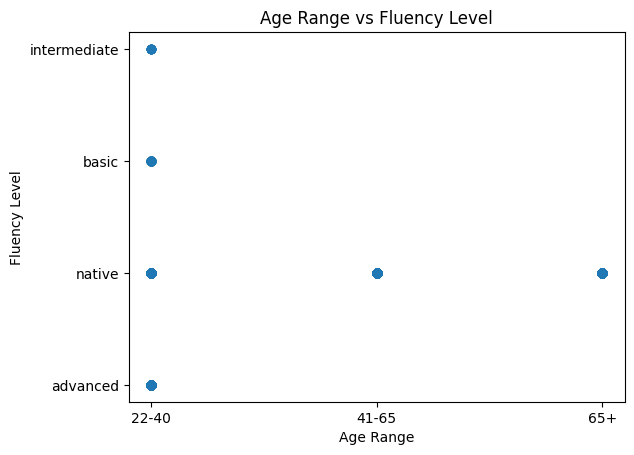

In [21]:
# Create a scatter plot of "ageRange" and "Self-reported fluency level"
plt.scatter(df['ageRange'], df['fluency_level'],)
plt.xlabel('Age Range')
plt.ylabel('Fluency Level')
plt.title('Age Range vs Fluency Level')
plt.show()


## Improving the model

Some other approaches which may result in better project results:

There are many other approaches you could take to analyze a classification model on a dataset containing "wav" files, depending on your specific goals and the characteristics of your data. Some possible alternatives or additional steps you could consider include:

1. Using cross-validation to better evaluate the model's performance and reduce the risk of overfitting.
2. Applying feature selection techniques to identify the most relevant and informative features in the audio data.
3. Trying different feature extraction techniques to see which ones yield the best results.
4. Using data augmentation techniques to increase the size and diversity of the training set. (we cannot use external dataset in this exam request).
5. Ensembling multiple models to improve performance and reduce overfitting.
6. Visualizing the model's performance and learning process to gain insights and identify patterns.

It's also important to keep in mind that the specific approach you take will depend on the nature of your dataset, the complexity of the classification task, and the resources (e.g. time, computation, data) available to you.

## Classification methods

There are many classification methods that can be applied to a dataset containing "wav" files, which are a type of audio file. Some common methods include:

1. K-nearest neighbors (KNN)
2. Logistic regression
3. Decision trees
4. Support vector machines (SVMs)
5. Naive Bayes
6. Artificial neural networks (ANNs)

Which method is most suitable for your dataset will depend on the specific characteristics of your data and the goals of your classification task. It may be helpful to try out a few different methods and compare their performance to see which one works best for your dataset.

In [23]:
!pip uninstall sklearn

^C


In [4]:
!pip install scikit-learn


  Using cached scikit_learn-1.2.0-cp39-cp39-win_amd64.whl (8.3 MB)


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [33]:
X = train_df.loc[:,['Id', 'fluency_level', 'native_language', 'job_language']]
X

,Id,fluency_level,native_language,job_language
0,0,advanced,English (United States),English (United States)
1,1,advanced,English (United States),English (United States)
2,2,advanced,English (United States),English (United States)
3,3,advanced,English (United States),English (United States)
4,4,advanced,English (United States),English (United States)
...,...,...,...,...
9849,9849,native,English (United States),English (United States)
9850,9850,native,English (United States),English (United States)
9851,9851,native,English (United States),English (United States)
9852,9852,native,English (United States),English (United States)


In [34]:
y = train_df.loc[:,['action','object']]
y

,action,object
0,change language,none
1,activate,music
2,deactivate,lights
3,increase,volume
4,increase,volume
...,...,...
9849,decrease,volume
9850,deactivate,lights
9851,deactivate,lights
9852,deactivate,lights


In [39]:
from sklearn.preprocessing import OneHotEncoder

# Split the development set into inputs and labels
X = train_df.loc[:, ['Id', 'fluency_level', 'native_language', 'job_language', 'action', 'object']]
y = train_df.loc[:, ['action', 'object']]

# Create dummy variables for the selected columns
X_dummies = pd.get_dummies(X)
y_dummies = pd.get_dummies(y)

In [40]:
X_dummies

,Id,fluency_level_advanced,fluency_level_basic,fluency_level_intermediate,fluency_level_native,native_language_English (Canada),native_language_English (United States),native_language_French (Canada),native_language_Spanish (Venezuela),native_language_Telugu,...,action_activate,action_change language,action_deactivate,action_decrease,action_increase,object_heat,object_lights,object_music,object_none,object_volume
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,9849,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9850,9850,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9851,9851,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9852,9852,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [42]:
y_dummies

,action_activate,action_change language,action_deactivate,action_decrease,action_increase,object_heat,object_lights,object_music,object_none,object_volume
0,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9849,0,0,0,1,0,0,0,0,0,1
9850,0,0,1,0,0,0,1,0,0,0
9851,0,0,1,0,0,0,1,0,0,0
9852,0,0,1,0,0,0,1,0,0,0


In [46]:
"""
y_flattened = y_dummies.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_flattened, test_size=0.2)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
"""

ValueError: Found input variables with inconsistent numbers of samples: [9854, 98540]